# Applications

Here, I am working up a few probabilistic applications of the ideas for the paper on the Age Area Hypothesis. The first application is to the Semetic language group, while the second is to the Turkic language group.

In [1]:
import copy
import os
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import random

if os.path.exists('C:\\Users\\matth\\'):
    os.environ['PROJ_LIB'] = 'C:\\Users\\matth\\Anaconda3\\pkgs\\basemap-1.2.1-py37h79c95a4_1\\Library\\share\\basemap'

from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from adjustText import adjust_text
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

start_dir = os.getcwd()
python_dir = pathlib.Path(os.getcwd()).parts[:-1] + ('Python',)
os.chdir(pathlib.Path(*python_dir))

from PyInstEvo import *

os.chdir(start_dir)
os.chdir('..')

pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=120)

%matplotlib inline

# Setting up the Basic Tree

We first call our method for initiating a blank tree. 

In [2]:
SemiticTree = PhyloTree(DFill(), 'Semitic Tree')

We will try and fill in a tree with the basic details of the following Tree, as estimated in the paper. Our approach is to just get a Tree in there that carries the basic structure of the tree below, and then tune it using maximum likelihood so all of the splits and extinction times are approximately correct.

Here is the tree:

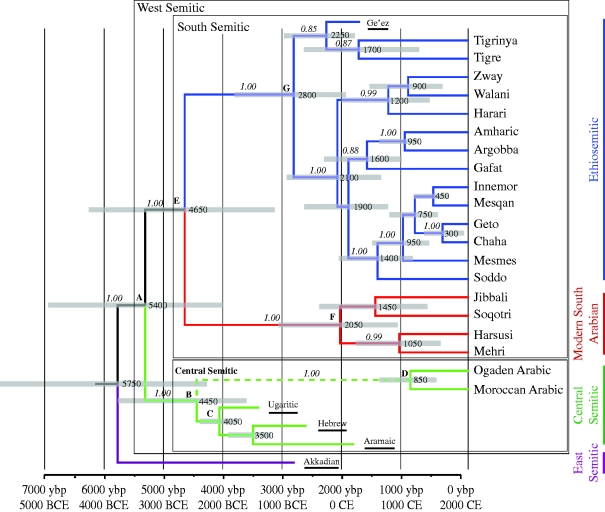

In [3]:
file = os.getcwd() + '\\SavedFigures\\rspb20090408fig2.jpg'
Image(filename = file)

In [4]:
names = ['Ge`ez', 'Tigrinya', 'Tigre', 'Zway', 'Walani', 'Harari', 'Amharic', 'Argobba', 'Gafat',
         'Innemor', 'Mesqan', 'Geto', 'Chaha', 'Mesmes', 'Soddo', 'Jibbali', 'Soqotri',
         'Harsusi', 'Mehri', 'Ogaden Arabic', 'Moroccan Arabic', 'Ugaritic', 'Hebrew', 'Aramaic', 'Akkadian']

names_to_add = []
for name in names:
    names_to_add.append([name])

Next, we can add in the current day location of each people. We can get these from the Ethnographic Atlas or by just looking them up. Coordinates are longitude, then latitude:

In [5]:
locs = {'Ge`ez': [41., 12.94], 'Tigrinya': [39., 14.], 'Tigre': [39., 17.],
        'Zway': [38.72, 7.93], 'Walani': [36.5, 6.5], 'Harari': [36.4, 9.65],
        'Amharic': [39.2, 12.5], 'Argobba': [38.72, 10.67], 'Gafat': [37, 12.2],
        'Innemor': [36.67, 8.33], 'Mesqan': [38.38, 8.12], 'Geto': [39.2, 8.2], 
        'Chaha': [39.6, 8.9], 'Mesmes': [37.1, 7.5], 'Soddo': [42.85, 6.6],
        'Jibbali': [54.84, 17.27], 'Soqotri': [53.77, 12.55],
        'Harsusi': [55.9, 19.91], 'Mehri':[51.66, 17.06], 
        'Ogaden Arabic':[44.58, 7.39], 'Moroccan Arabic':[-6.93, 32.64],
        'Ugaritic': [35.79, 35.60], 'Hebrew':[34.88, 31.66], 'Aramaic': [40.08, 36.30],
        'Akkadian':[46.5, 32.05] }

lats = []
lons = []
for item in locs:
    lons.append(locs[item][0])
    lats.append(locs[item][1])

Fill in the name attribute of the Tree:

In [6]:
SemiticTree.name = np.matrix(names_to_add)

In [7]:
plt.scatter(lons, lats)
mplleaflet.display()

C:\Users\mjbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Which looks about right. Let's add in the distances and then compute the pairwise great circle distance matrix:

In [8]:
SemiticTree.lat = np.array(lats)
SemiticTree.lon = np.array(lons)
SemiticTree.D = gcircledist(SemiticTree.lat, SemiticTree.lon)

Here is a tree written as a nested panel structure. 

Following the nested tree structure is the matrix of of extinction times, where a zero marks a language that has failed to make it to the present time. The number following the zero controls how far the branch should be rolled back. 

The final matrix gives the approximate date at which the language became extinct. I believe these are in writting in terms of the Common Era timing, not before present. 

In [9]:
TMat = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6],
        [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9],
        [0, 1, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10, 11, 12, 13],
        [0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 8, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]

DMat = [[0, .4], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [0, .1], [0, .1], [0, .1], [0, .1]]

DeData = [[200, 25], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50],
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [-1200, 25], [-600, 25], [-200, 25], [-800, 25]]

Add in each of these attributes to the tree:

In [10]:
SemiticTree.BaseTree = np.matrix(TMat).transpose()
SemiticTree.deathmat = np.matrix(DMat)
SemiticTree.deathdata = np.matrix(DeData)
SemiticTree.states = np.matrix(np.zeros((25, 400)))

Now, we take our base tree and formally declare it to be a "ResolvedTree," which means each of the linguistic groupings are bilateral splits. 

In [11]:
STR = ResolvedTree(SemiticTree, 'Semitic Tree')

Initiating from basic tree with user-provide matrices.


Here is a picture of the nested panel structure. More colors mean more panels, so one can see how the Tree "grows" as we move left to right.

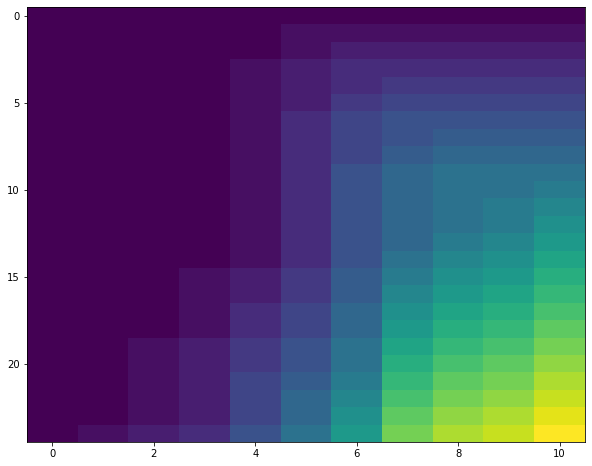

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(STR.resolvedtree, aspect='auto')

Here we can unpack aspects of the tree, with the aim in mind of seeing how many parameters we need to set the whole tree. We need parameters for each branch, parameters for each extinction, etc. We can take a look at these using the

In [13]:
numbranches = STR.interiorbranches                                        
bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(5)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit)) 

An alternative way of setting branches that seems to give a visually-pleasing initial tree...

In [14]:
bInit = np.ones((1, numbranches))*(-3)

To be clear, in the above, the branch parameters are given in `bInit`, while the `rInit` pertain to the rate changes for words. The dparms are the parameters that do the "back" correction for the matrix, while the eInit parameter is the overall depth of the tree. 

Here is a list of all the parameter values. Normally, we would also have rate parameters for the rate of linguistic change, but we don't need these for our purposes. 

In [15]:
STP = ParameterizedTree(SemiticTree, 'test', parmsInit)
STP.showparameters()

Initiating from basic tree with user-provide matrices.
Branch parameters:     [[-1.         -1.01811594 -1.03623188 -1.05434783 -1.07246377 -1.09057971 -1.10869565 -1.12681159 -1.14492754
  -1.16304348 -1.18115942 -1.19927536 -1.2173913  -1.23550725 -1.25362319 -1.27173913 -1.28985507 -1.30797101
  -1.32608696 -1.3442029  -1.36231884 -1.38043478 -1.39855072 -1.41666667]]
Rate parameters (ln):  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
Death parameters:      [[1. 1. 1. 1. 1.]]
Overall depth parms:   5.0



Inserting time splits derived from the paper before we go any further. 

**Note: we learned the hard way that these have to be complete, otherwise we wind up with flat spots in the tree! This means that all the numbers in the tree we are copying have to find their way into this list somehow!**

We have:

In [16]:
splits = pd.DataFrame([['Semetic', 'Akkadian', 'Aramaic',  5750, 25],
                       ['Semetic', 'Akkadian', 'Tigrinya', 5750, 25],
                       ['Semetic', 'Ge`ez', 'Tigrinya',     2250, 25],
                       ['Semetic', 'Tigrinya', 'Tigre',    1700, 25], 
                       ['Semetic', 'Zway', 'Walani',        900, 25],
                       ['Semetic', 'Harari', 'Walani',     1200, 25],
                       ['Semetic', 'Amharic', 'Argobba',    950, 25],
                       ['Semetic', 'Amharic', 'Gafat',     1600, 25],
                       ['Semetic', 'Innemor', 'Mesqan',     450, 25],
                       ['Semetic', 'Geto', 'Chaha',         300, 25],
                       ['Semetic', 'Innemor', 'Geto',       750, 25],
                       ['Semetic', 'Tigrinya', 'Chaha',               2800, 25],
                       ['Semetic', 'Jibbali', 'Soqotri',              1450, 25],
                       ['Semetic', 'Mehri', 'Walani',                 4650, 25],
                       ['Semetic', 'Harsusi', 'Mehri',                1050, 25],
                       ['Semetic', 'Ogaden Arabic', 'Moroccan Arabic', 850, 25],
                       ['Semetic', 'Ugaritic', 'Hebrew',              4050, 25],
                       ['Semetic', 'Hebrew', 'Tigrinya',              5400, 25],
                       ['Semetic', 'Hebrew', 'Aramaic',               3500, 25],
                       ['Semetic', 'Moroccan Arabic', 'Aramaic',      4450, 25],
                       ['Semetic', 'Soqotri', 'Harsusi',              2050, 25],
                       ['Semetic', 'Soddo', 'Innemor',                1400, 25],
                       ['Semetic', 'Mesmes', 'Chaha',                  950, 25],
                       ['Semetic', 'Soddo', 'Gafat',                  1900, 25],
                       ['Semetic', 'Soddo', 'Walani',                 2100, 25]])

In [17]:
STP.splitinfo(splits)
STP.priordepth(7.2, 6.2)
STP.settimes()

The following is a parameterized tree that fairly closely approximates the tree in the above-mentioned article. We can actualy calculate its likelihood as constructed, using the split times and the extinction times... 

-6799.948091822845 -585.3216492840306


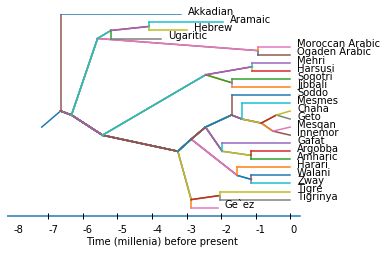

In [18]:
btouse = np.matrix([[-.4, .1, -.399, -.34, -1.54, -1.01, -1.4, -.814, -0.914, -.14, -1.78, -1.3, -2, 
                     -2, -.8, .21, 1.6, -2.6, 
                     -.4, .2, -1.8, -2, -3, -2.5]])
# In reverse order:
# First is root length
# Second is Akkadian Split
# Break up of Arabic - the (-2.6) is the breakup of Aramaic, Hebrew and Ugaritic
# (-2) IS THE breakup of the soddo-geez group
# (-1.78 is the breakup of soddo-amharic group)
# -0.914 is the Tigre-Tigrinya split
# -1.01 is the Walani-Zway split
# -2.54 is the mesmes-innemor breakup
# -3.9999 is the Chat Geto Mesqan Innemor breakup

dtouse = np.matrix([[1, .95, 1, -.1, -.10]])

STP.bparms = btouse
STP.dparms = dtouse
STP.settimes()
print(STP.SplitLikelihood(), STP.DeathLikelihood())
ax =STP.showtree()

# Tuning to match another Tree - Formal Method

Here, we use a simple algorithm to tune the branch parameters so that we get a closer match. 

So, an MCMC algorithm will propose changes to each parameter, and then compare log likelihoods so as to take the one that matches things best. Anyways, we can modify our MCMC algorithm as follows - I will use a mwg sampler first, as the extension to a global sampler isn't that bad. 

One thing to be careful about - you want initialization to note use old things that might be hanging around!

In [19]:
numbranches = STP.interiorbranches

bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(0)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit))

In [20]:
Told = ParameterizedTree(SemiticTree, 'mcmc', parmsInit)
Told.splitinfo(splits)
Told.priordepth(5, 6)
Told.settimes()

Initiating from basic tree with user-provide matrices.


In [21]:
draws  = 200
damper = .5
aopt   = .25

xold = np.hstack((bInit, dInit, eInit))              # Complete vector of parameters
nb    = np.shape(xold)[1]                     # Number of parameters
bdim  = np.shape(bInit)[1]                     # Break point between branch and death parameters

lam   = 2.38**2 / nb*np.ones((1, nb))           # adaptation parameter
 
val = []                                       # holder for likelihood
Accept = np.zeros((1, nb))                     # Acceptances
alpha  = np.zeros((1, nb))                     # alpha probability of acceptance
xs     = []                                    # place older for parameter values
mu     = np.array(xold).flatten()             # mean of proposal distribution (not needed for this routine)

Vinit = np.eye(nb)                             # Initial variance for proposals

old = Told.SplitLikelihood() + Told.DeathLikelihood()
print(old)

-23546.24555116638


Initial values of the Tree in terms of likelihood:

In [22]:
Told.SplitLikelihood(), Told.DeathLikelihood()

(-19025.730946195967, -4520.514604970411)

### Basic MCMC algorithm 

This algorithm proposes changes and accepts them if the likelihood is higher, to get a tighter fit between my tree and the one in the article.

In [23]:
for i in np.arange(draws):
    accept = np.zeros((1, nb))
    
    for j in range(nb):
        Tnew = copy.deepcopy(Told)
        xnew = copy.deepcopy(xold)
        xnew[0, j] = xold[0, j] + multivariate_normal.rvs(0)*np.sqrt(Vinit[j, j])*lam[0, j]
        bParms = xnew[:, 0:bdim]
        dParms = xnew[:, bdim:-1]
        eParms = xnew[:, -1][0, 0]
        
        Tnew.bparms = bParms
        Tnew.dparms = dParms
        Tnew.eparms = eParms
        Tnew.settimes()        
        
        pro    = Tnew.SplitLikelihood() + Tnew.DeathLikelihood()
     
        if np.isnan(xnew[0, j]):
            alpha[0, j] = 0
        elif pro > old:
            alpha[0, j] = 1
        else:
            alpha[0, j] = np.exp(pro - old)
            
        if np.random.uniform(0, 1) < alpha[0, j]:
            old = pro
            xold = xnew[:]
            accept[0, j] = 1
            Told = copy.deepcopy(Tnew)
        
        if np.random.uniform(0, 1) > .999:
            print(i, old)
    
    xs.append(xold)        
    val.append(old)
    lam = lam*np.exp(1/(i + 1)**damper*(alpha - aopt))
    Accept = np.vstack((Accept, accept))

48 -95.99062888182009
66 -67.91457243993948
105 -42.116281829155376
114 -43.842136519537696
117 -41.19016989829966
135 -42.895872724683976
190 -35.05666332447507


In [24]:
Told.DeathLikelihood(), Told.SplitLikelihood()

(-5.252044271180599, -34.27174506442009)

The associated tree after the algorithm has run:

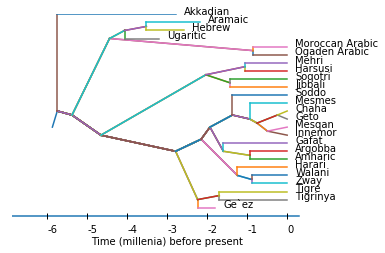

In [25]:
Told.showtree()

# Some sample by-hand calculations

These are the results if we simply calculate out maximum likelihood routes by hand; we get, a value of the likelihood function in the event that everything started from the position of Akkadia, given the structure of the tree above. 

### Akkadian 

If this were the point of origin, the maximum likelihood path is something like:

- Akkadian to Ogaden (2750, .042), Ogaden to Soqotri (731, .066), Soqotri to Ge'ez (1386, .125), Ge'ez to Harari (621, 0.297), Harari to Gafat (291, 0.122), Gafat to Soddo (894, 0.031), Soddo to Mesmes (643, 0.079), Mesmes to Innemor (0.077, 104), Innemor to Geto (279, 0.033) Geto to Chaha (89, 0.078), Geto (0, 0.05) (10 migration events)
- Ogaden Arabic to Ugaradic (3263, 0.148), Ugaridic to Aramaic (394, 0.07), Aramaic to Hebrew (704, .085), Hebrew (0, 0.156) (3 migration events)
- Ogaden Arabic to Moroccan Arabic (5996, 0.604), Moroccan (0, 0.139) (1 migration event) 
- Soqotri to Mehri (551, .425), Mehri to Harsusi (548, .162), Harsusi (0, 0.18) (2 migration events)
- Soqotri to Jibbali (537, 0.099), Jibbali (0, 0.243) (1 migration events)
- Ge'ez to Tigrinya (246, 0.092), Tigrinya to Tigre (334, 0.095), Tigrinya (0, 0.283) (2 migration events)
- Harari to Zway (319, 0.15), Zway to Walani (351, 0.046), Walani (0, 0.152) (2 migration events)
- Gafat to Amharic (0.052, 241), Amharic to Argobba (210, 0.109) , Amharic (0, 0.156) (2 migration events)
- Innemor, Mesqan (190, 0.057), Mesqan (0, 0.071) (1 migration event)

Would require 11 separate migratory events. The likelihood of these events would be (time-normalized):

## Simplest calculation uses, effectively, just the tree structure. Here 

In [26]:
10*np.log(10)+3*np.log(3) + 4*(2*np.log(2)) + 3*(1*np.log(1))

31.866865240424353

## A more complex calculation would use the times as well

In [27]:
tfac = Told.depth
t10 = tfac*(0.042 + 0.066 + 0.125 + 0.297 + 0.122 + 0.031 + 0.079 + 0.077 + 0.033 + 0.078 + 0.050)
t3  = tfac*(0.148 + 0.070 + 0.085 + 0.156)
t11 = tfac*(0.604 + 0.139)
t21 = tfac*(0.425 + 0.162 + 0.180)
t12 = tfac*(0.099 + 0.243)
t22 = tfac*(0.092 + 0.095 + 0.283)
t23 = tfac*(0.150 + 0.046 + 0.152)
t24 = tfac*(0.052 + 0.109 + 0.156)
t13 = tfac*(0.057 + 0.071)

In [28]:
( 10*(np.log(10)-np.log(t10)) + 3*(np.log(3) - np.log(t3)) + 2*(np.log(2) - np.log(t21)) + 
    2*(np.log(2) - np.log(t22)) + 2*(np.log(2) - np.log(t23)) + 2*(np.log(2) - np.log(t24)) 
      - np.log(t11) - np.log(t12) - np.log(t13))

1.60020785013631

In [29]:
dfac = 100
lldist = -(np.log(2750) + np.log(731) + np.log(1386) + np.log(621) + np.log(291) + np.log(894) + np.log(643)
   + np.log(104) + np.log(279) + np.log(89) + np.log(3263) + np.log(394) + np.log(704) + np.log(5996) +
         np.log(425) + np.log(548) + np.log(537) + np.log(246) + np.log(334) + np.log(319) + np.log(351) +
         np.log(241) + np.log(210) + np.log(190)) + 24*np.log(dfac)
lldist

-38.34272662883846

So, we get a value of the likelihood that is 31.8, or 2.18 if we actually include distances. If we use our simple exponential model of distance jumping as well, we see that would add -38.342 to the likelihood.

Of course, this is only useful if we have a point of comparison...

# Ogaden Arabic

What about if the origin point were instead Ogaden Arabic? A couple of things...absolutely nothing changes concerning distances traversed. Indeed, many of the key branches are completely unaffected by the calculation!

- Ogaden Arabic to Akkadian (2750, 0.042), Akkadian (0, 0.506) (1)
- Ogaden to Soqotri (731, .066), Soqotri to Ge'ez (1386, .125), Ge'ez to Harari (621, 0.297), Harari to Gafat (291, 0.122), Gafat to Soddo (894, 0.031), Soddo to Mesmes (643, 0.079), Mesmes to Innemor (0.077, 104), Innemor to Geto (279, 0.033) Geto to Chaha (89, 0.078), Geto (0, 0.05) (9)
- Ogaden Arabic to Ugaradic (3263, 0.148), Ugaridic to Aramaic (394, 0.07), Aramaic to Hebrew (704, .085), Hebrew (0, 0.156) (3)
- Ogaden Arabic to Moroccan Arabic (5996, 0.604), Moroccan (0, 0.139) (1) 
- Soqotri to Mehri (551, .425), Mehri to Harsusi (548, .162), Harsusi (0, 0.18) (2)
- Soqotri to Jibbali (537, 0.099), Jibbali (0, 0.243) (1)
- Ge'ez to Tigrinya (246, 0.092), Tigrinya to Tigre (334, 0.095), Tigrinya (0, 0.283) (2)
- Harari to Zway (319, 0.15), Zway to Walani (351, 0.046), Walani (0, 0.152) (2)
- Gafat to Amharic (0.052, 241), Amharic to Argobba (210, 0.109) , Amharic (0, 0.156) (2)
- Innemor, Mesqan (190, 0.057), Mesqan (0, 0.071) (1)

In [30]:
9*np.log(9) + 3*np.log(3) + 4*(2*np.log(2)) + 4*(1*np.log(1))

28.616035506509867

With these times, we have:

In [31]:
t9 = tfac*(0.066 + 0.125 + 0.297 + 0.122 + 0.031 + 0.079 + 0.077 + 0.033 + 0.078 + 0.050)
t3  = tfac*(0.148 + 0.070 + 0.085 + 0.156)
t11 = tfac*(0.604 + 0.139)
t21 = tfac*(0.425 + 0.162 + 0.180)
t12 = tfac*(0.099 + 0.243)
t22 = tfac*(0.092 + 0.095 + 0.283)
t23 = tfac*(0.150 + 0.046 + 0.152)
t24 = tfac*(0.052 + 0.109 + 0.156)
t13 = tfac*(0.057 + 0.071)
t14 = tfac*(0.042 + 0.506)

In [32]:
( 9*(np.log(9)-np.log(t9)) + 3*(np.log(3) - np.log(t3)) + 2*(np.log(2) - np.log(t21)) + 
    2*(np.log(2) - np.log(t22)) + 2*(np.log(2) - np.log(t23)) + 2*(np.log(2) - np.log(t24)) 
      - np.log(t11) - np.log(t12) - np.log(t13) - np.log(t14))

-0.6629743826425625

If we knew that Ogaden or Akkadian housed our original location, what would be the relative likelihood of Akkadian? 

In [33]:
np.exp(2.183)/(np.exp(2.183) + np.exp(-0.08))

0.9057660047888769

The model returns an answer of about 90%. 

# Hebrew

What about if the origin point were instead Ogaden Arabic? A couple of things...absolutely nothing changes concerning distances traversed. Indeed, many of the key branches are completely unaffected by the calculation!

- Hebrew to Akkadian (1098, 0.042), Akkadian (0, 0.506) (1)
- Hebrew to Mehri (2345, .066), Mehri to Ge'ez (1233, 0.125), Ge'ez to Harari (621, 0.297), Harari to Gafat (291, 0.122), Gafat to Soddo (894, 0.031), Soddo to Mesmes (643, 0.079), Mesmes to Innemor (0.077, 104), Innemor to Geto (279, 0.033), Geto to Chaha (89, 0.078), Geto (0, 0.05) (9)
- Hebrew to Ogaden Arabic (2881, 0.148), Ogaden Arabic to Moroccan Arabic (5996, 0.604), Moroccan Arabic (0, 0.139) (2)
- Hebrew to Ugaritic (446, 0.070), Ugaritic (0, 0.140) (1) 
- Hebrew to Aramaic (704, 0.085), Aramaic (0, 0.225) (1)
- Mehri to Jibbali (339, .425), Soqotri to Jibbali (537, 0.099), Jibbali (0, 0.243) (2)
- Mehri to Harsusi (548, .162), Harsusi (0, 0.18) (1)
- Ge'ez to Tigrinya (246, 0.092), Tigrinya to Tigre (334, 0.095), Tigrinya (0, 0.283) (2)
- Harari to Zway (319, 0.15), Zway to Walani (351, 0.046), Walani (0, 0.152) (2)
- Gafat to Amharic (0.052, 241), Amharic to Argobba (210, 0.109) , Amharic (0, 0.156) (2)
- Innemor to Mesqan (190, 0.057), Mesqan (0, 0.071) (1)

The simplest model now gives:

In [34]:
9*np.log(9) + 5*(2*np.log(2))

26.70649300162543

The lessening of this value owes a lot to the fact that one must posit a bunch of single-event migrations out of the land of the Hebrews to Akkadia, and also Ugarit, and also Ogaden. Okay...but what if times are included?

In [35]:
t11 = tfac*(0.042 + 0.506)
t9 = tfac*(0.066 + 0.125 + 0.297 + 0.122 + 0.031 + 0.079 + 0.077 + 0.033 + 0.078 + 0.050)
t21 = tfac*(0.148 + 0.604 + 0.139)
t12 = tfac*(0.070 + 0.140)
t13 = tfac*(0.085 + 0.225)
t22 = tfac*(0.425 + 0.099 + 0.243)
t14 = tfac*(0.162 + 0.180)
t23 = tfac*(0.092 + 0.095 + 0.283)
t24 = tfac*(0.052 + 0.109 + 0.156)
t25 = tfac*(0.150 + 0.046 + 0.152)
t15 = tfac*(0.057 + 0.071)

In [36]:
( 9*(np.log(9)-np.log(t9)) + 2*(np.log(2) - np.log(t21)) + 
    2*(np.log(2) - np.log(t22)) + 2*(np.log(2) - np.log(t23)) + 2*(np.log(2) - np.log(t24)) - 2*(np.log(2) - np.log(t25)) 
      - np.log(t11) - np.log(t12) - np.log(t13) - np.log(t14) - np.log(t15))

-2.1581894613846337

What about the distance calculation for Hebrew?

In [37]:
lldist = -(np.log(1098) + np.log(2345) + np.log(1233) + np.log(621) + np.log(291) + np.log(894) + np.log(643)
   + np.log(104) + np.log(279) + np.log(89) + np.log(2881) + np.log(5996) + np.log(446) + np.log(704) +
         np.log(339) + np.log(537) + np.log(548) + np.log(246) + np.log(334) + np.log(319) + np.log(351) +
         np.log(241) + np.log(210) + np.log(190)) + 24*np.log(dfac)
lldist

-38.24664102446182

What about Hebrew relative to Akkadian? The model suggests the probability is:

In [38]:
np.exp(-1.67)/(np.exp(-1.67) + np.exp(2.18))

0.020836344518680428

Around 2%. Of course, we can use our routine to just calculate everything out all at once. A complex likelihood calculation with distances, etc. gives:

In [39]:
vals=OriginLikelihood_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D, Told.filledtimeFractions*Told.depth*1000)

# Graphs of Origin Probabilities

In [66]:
v = vals-np.max(vals)
v = 10*np.exp(vals)/np.sum(np.exp(vals))

C:\Users\mjbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


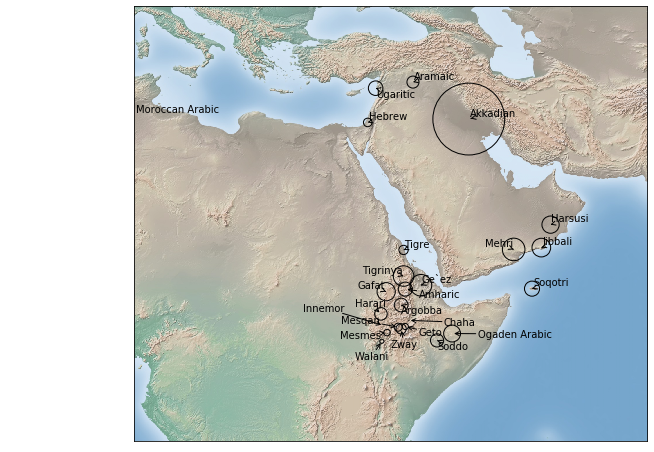

In [69]:
y = np.asarray(Told.lat.astype(float)).flatten().tolist()
x = np.asarray(Told.lon.astype(float)).flatten().tolist()
     
Order=np.asarray(Told.resolvedtree[:,-1]).astype(int).flatten()

y = [y[i] for i in Order]
x = [x[i] for i in Order]
        
name = np.asarray(Told.name).flatten().tolist()

s = [1000*n for n in v-np.min(v)]
    
myfig = plt.figure(figsize=(10, 8))
    
h = 3000
    
m = Basemap(llcrnrlon=8, llcrnrlat=-5,urcrnrlon=67,urcrnrlat=45, resolution='l')
#m.drawlsmask()
#m.drawcoastlines()
#m.fillcontinents(color='lightgray', zorder=0)
m.shadedrelief()
  
#m.scatter(x, y, s=s, c=s, cmap='Reds', linewidths=1, latlon=True)
m.scatter(x, y, s=s, edgecolors='black', linewidths=1, facecolors='none')

xpt, ypt = m(x, y)

texts = [plt.text(xpt[i], ypt[i], name[i], ha='center', va='top') for i in range(len(name))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

myfig.show()